In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data/winequality-white.csv", sep=";")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## Prepare X and y

In [4]:
X = data.iloc[:,:-1]

In [6]:
y = data.iloc[:,-1:]

## Standardize X

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
X_std = StandardScaler().fit_transform(X, y)

## Split the dataset

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2)

In [27]:
X_train.shape, X_test.shape, y_test.shape, y_train.shape

((3918, 11), (980, 11), (980, 1), (3918, 1))

## Kernel Ridge Regression (for Regression)

In [116]:
from sklearn.kernel_ridge import KernelRidge

In [117]:
reg = KernelRidge(alpha=0.1, kernel='rbf', gamma=0.01)

In [118]:
reg.fit(X_train, y_train)

KernelRidge(alpha=0.1, gamma=0.01, kernel='rbf')

In [119]:
reg.score(X_test, y_test)

0.30892449319773707

In [120]:
y_pred = reg.predict(X_test)
y_pred[:10]

array([[5.51110357],
       [5.81791953],
       [5.67482473],
       [5.67952995],
       [6.98596553],
       [5.0817284 ],
       [5.8060986 ],
       [5.99214877],
       [5.36642527],
       [6.21428259]])

In [121]:
from sklearn.metrics import mean_squared_error

In [122]:
mean_squared_error(y_test, y_pred, squared=False)

0.7041724993416734

### Grid Search

In [124]:
from sklearn.model_selection import GridSearchCV

In [132]:
grid_parameters = {
    'alpha':np.logspace(-3,3,10),
    'gamma':np.logspace(-3,3,10)
}
score = mean_squared_error

In [133]:
grid_reg = GridSearchCV( KernelRidge(kernel='rbf'), param_grid=grid_parameters, cv=5, scoring=score )

In [134]:
grid_reg.fit(X_train, y_train)

/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: mean_squared_error() takes 2 positional arguments but 3 were given

  warnings.warn(
/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: mean_squared_error() takes 2 positional arguments but 3 were given

  war

/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: mean_squared_error() takes 2 positional arguments but 3 were given

  warnings.warn(
/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: mean_squared_error() takes 2 positional arguments but 3 were given

  war

/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: mean_squared_error() takes 2 positional arguments but 3 were given

  warnings.warn(
/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: mean_squared_error() takes 2 positional arguments but 3 were given

  war

/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: mean_squared_error() takes 2 positional arguments but 3 were given

  warnings.warn(
/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: mean_squared_error() takes 2 positional arguments but 3 were given

  war

/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: mean_squared_error() takes 2 positional arguments but 3 were given

  warnings.warn(
/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: mean_squared_error() takes 2 positional arguments but 3 were given

  war

/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: mean_squared_error() takes 2 positional arguments but 3 were given

  warnings.warn(
/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: mean_squared_error() takes 2 positional arguments but 3 were given

  war

/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: mean_squared_error() takes 2 positional arguments but 3 were given

  warnings.warn(
/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: mean_squared_error() takes 2 positional arguments but 3 were given

  war

/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: mean_squared_error() takes 2 positional arguments but 3 were given

  warnings.warn(
/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: mean_squared_error() takes 2 positional arguments but 3 were given

  war

/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: mean_squared_error() takes 2 positional arguments but 3 were given

  warnings.warn(
/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: mean_squared_error() takes 2 positional arguments but 3 were given

  war

/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: mean_squared_error() takes 2 positional arguments but 3 were given

  warnings.warn(
/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: mean_squared_error() takes 2 positional arguments but 3 were given

  war

/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: mean_squared_error() takes 2 positional arguments but 3 were given

  warnings.warn(
/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: mean_squared_error() takes 2 positional arguments but 3 were given

  war

/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: mean_squared_error() takes 2 positional arguments but 3 were given

  warnings.warn(
/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: mean_squared_error() takes 2 positional arguments but 3 were given

  war

/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: mean_squared_error() takes 2 positional arguments but 3 were given

  warnings.warn(
/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: mean_squared_error() takes 2 positional arguments but 3 were given

  war

/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: mean_squared_error() takes 2 positional arguments but 3 were given

  warnings.warn(
/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: mean_squared_error() takes 2 positional arguments but 3 were given

  war

/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: mean_squared_error() takes 2 positional arguments but 3 were given

  warnings.warn(
/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: mean_squared_error() takes 2 positional arguments but 3 were given

  war

/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: mean_squared_error() takes 2 positional arguments but 3 were given

  warnings.warn(
/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: mean_squared_error() takes 2 positional arguments but 3 were given

  war

/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: mean_squared_error() takes 2 positional arguments but 3 were given

  warnings.warn(
/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: mean_squared_error() takes 2 positional arguments but 3 were given

  war

/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: mean_squared_error() takes 2 positional arguments but 3 were given

  warnings.warn(
/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: mean_squared_error() takes 2 positional arguments but 3 were given

  war

/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: mean_squared_error() takes 2 positional arguments but 3 were given

  warnings.warn(
/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: mean_squared_error() takes 2 positional arguments but 3 were given

  war

/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: mean_squared_error() takes 2 positional arguments but 3 were given

  warnings.warn(
/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: mean_squared_error() takes 2 positional arguments but 3 were given

  war

/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: mean_squared_error() takes 2 positional arguments but 3 were given

  warnings.warn(
/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: mean_squared_error() takes 2 positional arguments but 3 were given

  war

/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: mean_squared_error() takes 2 positional arguments but 3 were given

  warnings.warn(
/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: mean_squared_error() takes 2 positional arguments but 3 were given

  war

/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: mean_squared_error() takes 2 positional arguments but 3 were given

  warnings.warn(
/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: mean_squared_error() takes 2 positional arguments but 3 were given

  war

/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: mean_squared_error() takes 2 positional arguments but 3 were given

  warnings.warn(
/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: mean_squared_error() takes 2 positional arguments but 3 were given

  war

/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: mean_squared_error() takes 2 positional arguments but 3 were given

  warnings.warn(
/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: mean_squared_error() takes 2 positional arguments but 3 were given

  war

/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: mean_squared_error() takes 2 positional arguments but 3 were given

  warnings.warn(
/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: mean_squared_error() takes 2 positional arguments but 3 were given

  war

/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: mean_squared_error() takes 2 positional arguments but 3 were given

  warnings.warn(
/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: mean_squared_error() takes 2 positional arguments but 3 were given

  war

/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: mean_squared_error() takes 2 positional arguments but 3 were given

  warnings.warn(
/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: mean_squared_error() takes 2 positional arguments but 3 were given

  war

/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: mean_squared_error() takes 2 positional arguments but 3 were given

  warnings.warn(
/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: mean_squared_error() takes 2 positional arguments but 3 were given

  war

/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: mean_squared_error() takes 2 positional arguments but 3 were given

  warnings.warn(
/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/valkea/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: mean_squared_error() takes 2 positional arguments but 3 were given

  war

GridSearchCV(cv=5, estimator=KernelRidge(kernel='rbf'),
             param_grid={'alpha': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03])},
             scoring=<function mean_squared_error at 0x7f7246d99040>)

In [135]:
grid_reg.best_score_

nan

## Kernel Ridge Regression (for Classification)

In [61]:
y_bin = np.where(y<6, 0,1)

In [62]:
X_std_bin = StandardScaler().fit_transform(X, y_bin)

In [63]:
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_std_bin, y_bin, test_size=0.2)

In [64]:
X_train_bin.shape, X_test_bin.shape, y_test_bin.shape, y_train_bin.shape

((3918, 11), (980, 11), (980, 1), (3918, 1))

In [81]:
from sklearn.kernel_ridge import KernelRidge

In [82]:
cls = KernelRidge(alpha=0.1, kernel='rbf', gamma=0.01)

In [83]:
cls.fit(X_train_bin, y_train_bin)

KernelRidge(alpha=0.1, gamma=0.01, kernel='rbf')

In [84]:
cls.score(X_test_bin, y_test_bin)

0.29493661556372386

In [85]:
y_pred_bin = cls.predict(X_test_bin)
y_pred_bin[:10]

array([[0.45799853],
       [0.68189404],
       [0.81876618],
       [0.78586842],
       [0.83056159],
       [0.38325782],
       [0.63172432],
       [0.32971998],
       [0.78082042],
       [0.97958414]])

In [94]:
from sklearn.metrics import roc_curve, auc

In [95]:
fpr, tpr, thresholds = roc_curve(y_test_bin, y_pred_bin)
aucv = auc(fpr, tpr)

In [100]:
aucv

0.8269405461522776

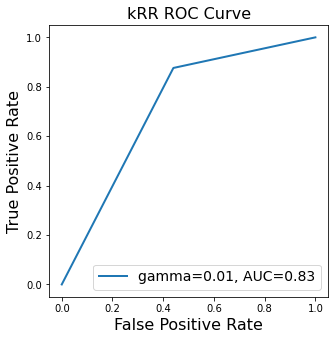

In [108]:
fig = plt.figure(figsize=(5,5))

plt.plot(fpr, tpr, '-', lw=2, label=f"gamma=0.01, AUC={aucv:.2f}")
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('kRR ROC Curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14)
plt.show()